In [ ]:
import pandas as pd
# pandas is alised as pd

import numpy as np
# numpy is aliased as np

import matplotlib.pyplot as plt
# matplotlib.pyplot is alised as plt

import seaborn as sns
# seaborn is aliased as sns

#### Feature description

<pre>
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
</pre>

In [ ]:
df = pd.read_csv('train.csv')
df.head() # top 5 rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape
# rows=10886, cols = 12

(10886, 12)

#### Handling the null values

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
print(df.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


#### Checking data types of the columns

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

#### Converting datetime from object to datetime data

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

#### Creating Year, Month, Day and Hour columns from datetime field

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


#### Columns not needed are as follows:
datetime, registed and casual

In [ ]:
df.drop(['datetime','registered','casual'],axis=1,inplace=True)  # axis=1, indicates columns
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


### EDA

In [ ]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
df['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [ ]:
df['month'].value_counts()

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

In [ ]:
df['day'].value_counts()

1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: day, dtype: int64

In [ ]:
df['hour'].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

#### Depicting Month wise mean of count

In [ ]:
r1 = df.groupby(['month'])['count'].mean()
r1

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

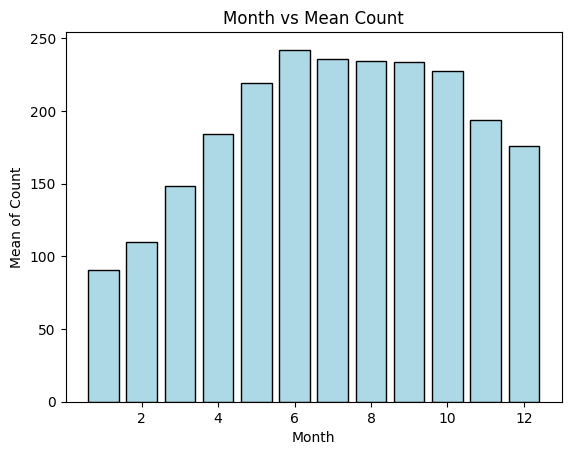

In [ ]:
plt.bar(r1.index,r1,color='lightblue',edgecolor='black')
plt.title('Month vs Mean Count')
plt.xlabel('Month')
plt.ylabel('Mean of Count')
plt.show()

#### Year wise mean of count

In [ ]:
r2 = df.groupby(['year'])['count'].mean()
r2

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

#### Histogram for count

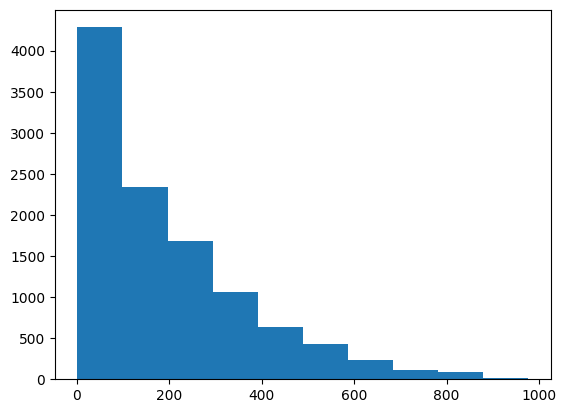

In [ ]:
plt.hist(df['count'])
plt.show()

#### Correlation

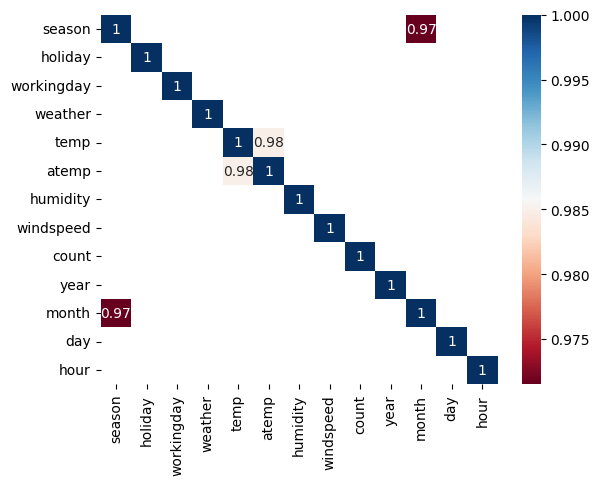

In [ ]:
corr = df.corr()
corr = corr[abs(corr)>=0.7]
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Inference
1) temp and atemp are highly correlated<br>
2) month and season are highly correlated

In [ ]:
df1 = df.copy()

#### Dropping Highly Correlated Columns

In [ ]:
df.drop(['atemp','season'],axis=1,inplace=True) # axis=1 indicates columns
df.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
df.dtypes

holiday         int64
workingday      int64
weather         int64
temp          float64
humidity        int64
windspeed     float64
count           int64
year            int64
month           int64
day             int64
hour            int64
dtype: object

#### Reading the test data

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
test.shape
# rows=6493, cols=9

(6493, 9)

#### Handling null values in the test data

In [ ]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [ ]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

#### Checking data types in the test dataset

In [ ]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

#### Converting datetime from object to datetime data in the test dataset

In [ ]:
test['datetime'] = pd.to_datetime(test['datetime'])
test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

#### Creating Year, Month, Day and Hour columns from datetime field in the test dataset

In [ ]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [ ]:
test.drop(['datetime'],axis=1,inplace=True) # axis=1 : columns
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
test.drop(['atemp','season'],axis=1,inplace=True)  # axis=1 : columns
test.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
df.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

#### Selecting independent and the dependent features from training dataset

In [ ]:
x = df.drop('count',axis=1) # x denotes independent features
y = df['count']             # y denotes dependent variable
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(10886, 10)
(10886,)


#### Splitting data into training and test data

In [ ]:
print(0.25*10886)
print(0.75*10886)

2721.5
8164.5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))

(8164, 10)
(2722, 10)
(8164,)
(2722,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Creating functions to evaluate the Regression Evaluation Metrics, Model Score and Model Coefficients and Intercept

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def reg_eval_metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    r2 = r2_score(ytest, ypred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

def mscore(model):
    print('Training Score',model.score(x_train,y_train)) # Trainng R2 score
    print('Testing Score',model.score(x_test,y_test))    # Test R2 Score

def reg_coef_inter(model):
    print('Model Coefficients',model.coef_)
    print('Model Intercept',model.intercept_)

#### Importing the ML Regression libraries

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor

#### 1) Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
mscore(lin_reg)

Training Score 0.38653954816248626
Testing Score 0.3899463099399243


In [ ]:
ypred_lr = lin_reg.predict(x_test)

In [ ]:
reg_eval_metrics(y_test,ypred_lr)

MAE: 107.2508261398116
MSE: 20750.314085300455
RMSE: 144.04969311074723
R2 Score: 0.3899463099399243


In [ ]:
reg_coef_inter(lin_reg)

Model Coefficients [-18.34828575  -1.33021488  -5.58145535   6.63408606  -2.01574749
   0.36022733  79.31111902   7.6292274    0.35828012   7.92942037]
Model Intercept -159493.7308867027


#### 2) KNN Regression

In [ ]:
knn = KNeighborsRegressor(n_neighbors=15)  # K=15 (number of nearest neighbors)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
mscore(knn)

Training Score 0.5805705784226683
Testing Score 0.5057644238515815


In [ ]:
ypred_knn = knn.predict(x_test)

In [ ]:
reg_eval_metrics(y_test,ypred_knn)

MAE: 91.2937545922116
MSE: 16810.886655237162
RMSE: 129.65680335114376
R2 Score: 0.5057644238515815


#### 3) Ridge Regression

In [ ]:
ridge = Ridge(alpha=10)  # lambda = alpha
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [ ]:
mscore(ridge)

Training Score 0.3865377802967519
Testing Score 0.38991763930464063


In [ ]:
ypred_ridge = ridge.predict(x_test)

In [ ]:
reg_eval_metrics(y_test,ypred_ridge)

MAE: 107.23636304036522
MSE: 20751.289285839124
RMSE: 144.053078015845
R2 Score: 0.38991763930464063


In [ ]:
reg_coef_inter(ridge)

Model Coefficients [-17.48158813  -1.25261265  -5.54369334   6.63565271  -2.01740147
   0.35828944  78.91461748   7.62779844   0.35864694   7.92787737]
Model Intercept -158696.17850013872


#### 4) Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.1) # lambda = alpha = 0.1
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
mscore(lasso)

Training Score 0.38652128639115757
Testing Score 0.39010741305769814


In [ ]:
ypred_lasso = lasso.predict(x_test)

In [ ]:
reg_eval_metrics(y_test,ypred_lasso)

MAE: 107.21995360778882
MSE: 20744.834337618577
RMSE: 144.03067151693273
R2 Score: 0.39010741305769814


In [ ]:
reg_coef_inter(lasso)

Model Coefficients [-14.01791394  -0.5106939   -5.26543877   6.63446736  -2.02171484
   0.3513941   78.87889793   7.62219816   0.3558474    7.92476066]
Model Intercept -158624.8465078409


#### Applying the best Model (KNNRegression) to the test_data

In [ ]:
test.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
x_train.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour'],
      dtype='object')

#### Generating predictions for the test dataset

In [ ]:
test_pred = knn.predict(test)

In [ ]:
test['Count_pred'] = test_pred
test.head(10)

,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour,Count_pred
0,0,1,1,10.66,56,26.0027,2011,1,20,0,82.533333
1,0,1,1,10.66,56,0.0000,2011,1,20,1,22.400000
2,0,1,1,10.66,56,0.0000,2011,1,20,2,34.866667
3,0,1,1,10.66,56,11.0014,2011,1,20,3,47.533333
4,0,1,1,10.66,56,11.0014,2011,1,20,4,47.533333
5,0,1,1,9.84,60,15.0013,2011,1,20,5,65.600000
6,0,1,1,9.02,60,15.0013,2011,1,20,6,68.600000
7,0,1,1,9.02,55,15.0013,2011,1,20,7,64.600000
8,0,1,1,9.02,55,19.0012,2011,1,20,8,114.533333
9,0,1,2,9.84,52,15.0013,2011,1,20,9,94.266667


In [ ]:
test.to_csv('bike_reantal_prediction.csv')